# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.


### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

****

## Summary of Findings
***

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import scipy.stats as stats
import pylab

# matplotlib setup
%matplotlib inline

# turn edges on in plt
plt.rcParams["patch.force_edgecolor"] = True

np.random.seed(42)

In [2]:
# FUNCTIONS USED

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

In [3]:
df = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
df.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [4]:
df.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Generate some basic statistics about the data set

In [5]:
# aggregate values
r = np.sum(df.call)
n = len(df)
p = r/n
print('AGGREGATE\ntotal resumes: {}\ncallbacks: {}\nsuccess rate: {:0.3}%\n\n'.format(n, r, (p * 100)))


w = df[df.race == 'w']
b = df[df.race == 'b']

# white-sounding names
w_r = np.sum(w.call)
w_n = len(w)
w_p = (w_r / w_n)
print('White-sounding names:\ntotal resumes: {}\ncallbacks: {}\nsuccess rate: {:0.3}%\n\n'.format(w_n, w_r, (w_p * 100)))

# black-sounding names
b_r = np.sum(b.call)
b_n = len(b)
b_p = (b_r / b_n)
print('Black-sounding names:\ntotal resumes: {}\ncallbacks: {}\nsuccess rate: {:0.3}%\n\n'.format(b_n, b_r, (b_p * 100)))



AGGREGATE
total resumes: 4870
callbacks: 392.0
success rate: 8.05%


White-sounding names:
total resumes: 2435
callbacks: 235.0
success rate: 9.65%


Black-sounding names:
total resumes: 2435
callbacks: 157.0
success rate: 6.45%




In [25]:
tbl = pd.DataFrame({'BSN': np.array([b_r, b_n - b_r, b_p * 100, b_n]).astype(int),
                    'WSN': np.array([w_r, w_n - w_r, w_p * 100, w_n]).astype(int),
                    'Row total': np.array([r, n-r, (b_r + w_r)/n * 100, n])})
#tbl.set_index(['Callback', 'No response', '% Success', 'Column total'])
tbl

,BSN,Row total,WSN
0,157,392.000000,235
1,2278,4478.000000,2200
2,6,8.049281,9
3,2435,4870.000000,2435


In [59]:
tbl = pd.DataFrame({'WSN' : np.array([w_r, w_n - w_r, w_n]).astype(int),
       'BSN' : np.array([b_r, b_n - b_r, b_n]).astype(int)})

tbl

,BSN,WSN
0,157,235
1,2278,2200
2,2435,2435


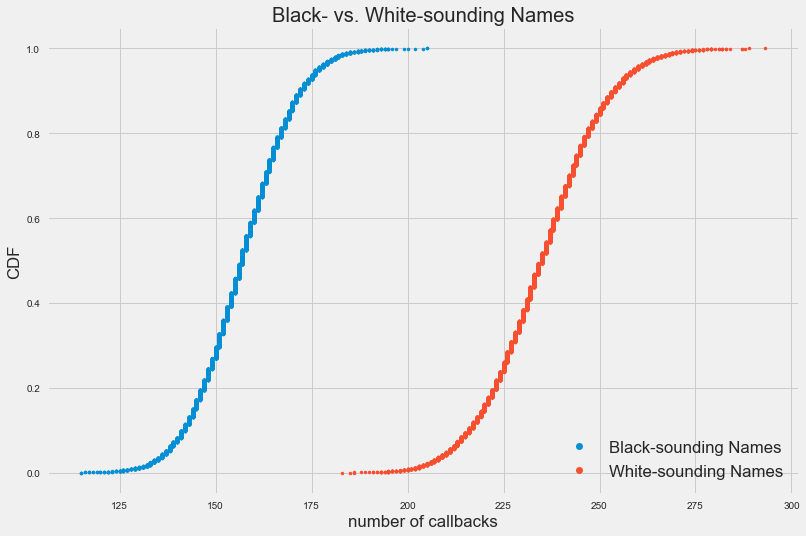

In [7]:
# Plot CDFs of callbacks for black- vs. white-sounding names

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

w_samples = np.random.binomial(w_n, w_p, size=10000)
b_samples = np.random.binomial(b_n, b_p, size=10000)

bx, by = ecdf(b_samples)
_ = plt.plot(bx, by, marker='.', linestyle='none')

wx, wy = ecdf(w_samples)
_ = plt.plot(wx, wy, marker='.', linestyle='none')

plt.margins = 0.02
_ = plt.xlabel('number of callbacks')
_ = plt.ylabel('CDF')
_ = plt.title('Black- vs. White-sounding Names')
_ = plt.legend(('Black-sounding Names', 'White-sounding Names'), loc='lower right', fontsize='large', markerscale=2)

## Question #1: What is the appropriate test for this problem?
***
We are comparing the success rates, as measured by the proportions of callbacks to resumes sent, of two separate sample sets.  These samples are binomial distributions, and a callback will be labeled a success.

Given a large enough sample size, the binomial distribution begins to approximate the normal distribution, as shown in the CDF plots above.  The number of samples is deemed to be large enough for a binomial distribution to be treated as a normal distribution provided that $n * p$ and $n(1-p)$ are both greater than 5 (some sources suggest greater than 10 or even 15).  In any case, our numbers are well above all three thresholds.

Given that we have a large enough number of samples that were drawn independently from the same distribution, which has a finite mean and variance, the Central Limit Theorem applies.

Since we are measuring the success rates of two binomial distributions, a two-sample test is called for.  The number of samples is large, so we may use the two-sample $Z$-test for proportions to calculate the margins of error, confidence intervals and p-values. 

We could also use resampling (bootstrap or permutation) to test our null hypothesis.




There's only Z-proportion.  There is no t-proportion.  If not enough samples to pass above test, don't have a normal distribution, so can't do Z-proportion, either.

If z-value is above 2.5, you're probably going to reject null hypothesis.  Inverse relationship to p-value.

Z-value means standard deviation.




## Question #2: Null & Alternate Hypotheses
***
__Null Hypothesis__: the probability of success (getting a callback) is the same for both resumes with white-sounding names and black-sounding names.  
$$H_0: \widehat p_w = \widehat p_b$$  

__Alternate Hypothesis__: the probability of success IS NOT THE SAME for resumes with white-sounding names as it is for those with black-sounding names.  
$$H_a: \widehat p_w \neq \widehat p_b$$

## Question #3: Margin of Error, Confidence Interval and p-value testing
***


### Frequentist Approach

$$Z = \frac{(\widehat p_1 - \widehat p_2) - 0}{\sqrt{\hat p(1 - \hat p)(\frac{1}{n_1} + \frac{1}{n_2})}}$$

where:
$$\hat p = \frac{Y_1 + Y_2}{n_1 + n_2}$$

In [8]:
w = df[df.race=='w']
b = df[df.race=='b']

n_w = len(w)
n_b = len(b)

prop_w = np.sum(w.call) / len(w)
prop_b = np.sum(b.call) / len(b)

prop_diff = prop_w - prop_b
phat = (np.sum(w.call) + np.sum(b.call)) / (len(w) + len(b))

z = prop_diff / np.sqrt(phat * (1 - phat) * ((1 / n_w) + (1 / n_b)))
pval = stats.norm.cdf(-z) * 2

print('Z-score: {}'.format(z))
print('p-value: {}\n'.format(pval))

moe = 1.96 * np.sqrt(phat * (1 - phat) * ((1 / n_w) + (1 / n_b)))
print('margin of error: \t{}'.format(moe))

# 95% confidence interval
ci = (prop_diff - moe, prop_diff + moe)

print('95% confidence int: \t{} - {}'.format(ci[0], ci[1]))



Z-score: 4.108412152434346
p-value: 3.983886837585077e-05

margin of error: 	0.015281912310894095
95% confidence int: 	0.01675094189855149 - 0.04731476652033968


### Bootstrap




Observed difference in proportions: 0.032032854209445585

p-value: 0.0
margin of error: +/- [ 0.01522634]
95% confidence int: [-0.01522634  0.01522634]


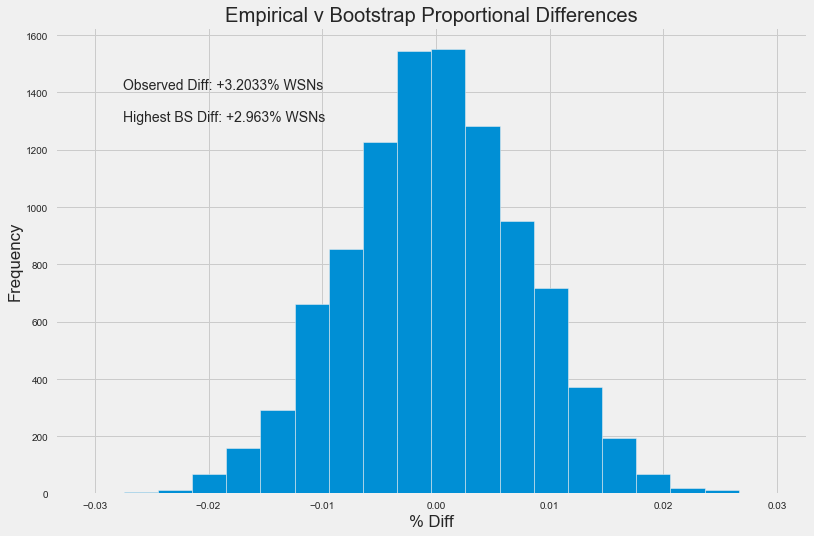

In [9]:
# Construct arrays of data: white-sounding names, black-sounding names
all_callbacks = np.array([True] * int(r) + [False] * int(n-r))

size = 10000
bs_reps_diff = np.empty(size)
for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callbacks, size=2430)) / 2430
    b_bs_replicates = np.sum(np.random.choice(all_callbacks, size=2430)) / 2430
    
    bs_reps_diff[i] = w_bs_replicates - b_bs_replicates
    
p = np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

print('Observed difference in proportions: {}\n'.format(prop_diff))

print('p-value: {}'.format(p))
print('margin of error: +/- {}'.format(np.percentile(bs_reps_diff, [97.5])))
print('95% confidence int: {}'.format(np.percentile(bs_reps_diff, [2.5, 97.5])))

_ = plt.hist(bs_reps_diff, bins=20)
_ = plt.xlabel('% Diff')
_ = plt.ylabel('Frequency')
_ = plt.title('Empirical v Bootstrap Proportional Differences')
_ = plt.text(-0.0275, 1300, 'Observed Diff: +{:0.5}% WSNs\n\nHighest BS Diff: +{:0.5}% WSNs'.format(prop_diff*100, np.max(bs_reps_diff)*100))

### Analysis: 
The p-value for the Frequentist and Boostrap approaches are both well below the p=0.05 threshold so we must reject the null hypothesis in favor of the alternate hypothesis that perception of race based on the name on the resume does have an effect on whether an applicant will receive a callback.  The 95% confidence interval does not include 0.  Therefore, we can conclude that at least 95% of the samples taken will not result in the chances for callbacks being the same, regardless of name.

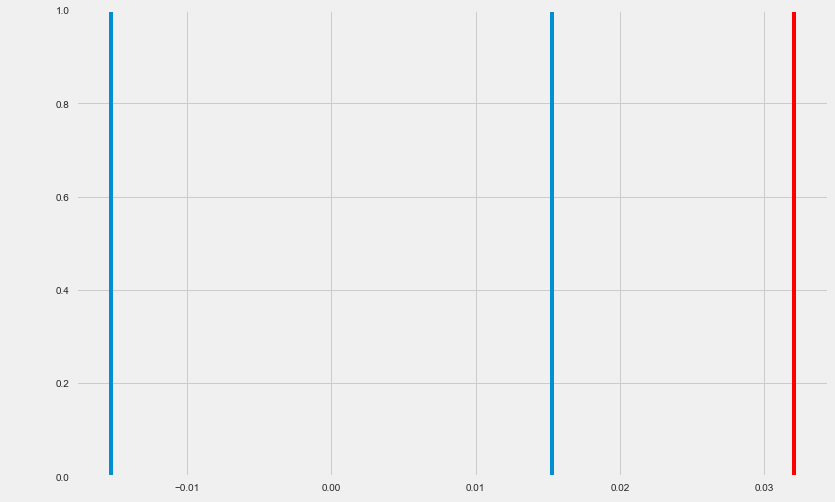

In [10]:
#x = np.linspace(-5 * s, 5 * s, 100)
#plt.plot(x, mlab.normpdf(x,0,s))
plt.axvline(moe)
plt.axvline(-moe)
plt.axvline(prop_diff, color='red')
plt.annotate(np.round(moe,4), (0.017,25))
plt.annotate(-np.round(moe,4), (-0.022,25))
plt.annotate('sample difference = ', (0.025,30))
plt.annotate(np.round(prop_diff,4), (0.03,25));


## Question #4: Write a story describing the statistical significance in the context or the original problem.
***



## Question #5: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
***
